In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   #결측치 시각화 모듈
import matplotlib.patches as patches

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Seaborn 내장 데이터 중 'titanic' 데이터 로드
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#데이터 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#데이터 결측치 수 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#Q.각 데이터 별로 결측치의 비율(%)은?
titanic.isnull().sum()/len(titanic)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
#소수점 2째자리까지
#round()의 위치가 중요. int에서는 에러
#%로 표현되기 때문에 (4)로 코딩해야 소수 2째 자리까지 반환
(titanic.isnull().sum()/len(titanic)).round(4)*100

survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64

In [ ]:
#데이터의 수, 즉 결측치가 아닌 데이터 수
titanic.notnull().sum()
#titanic.count()  #우리가 이미 알고 있는 count() 메서드

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

<Axes: >

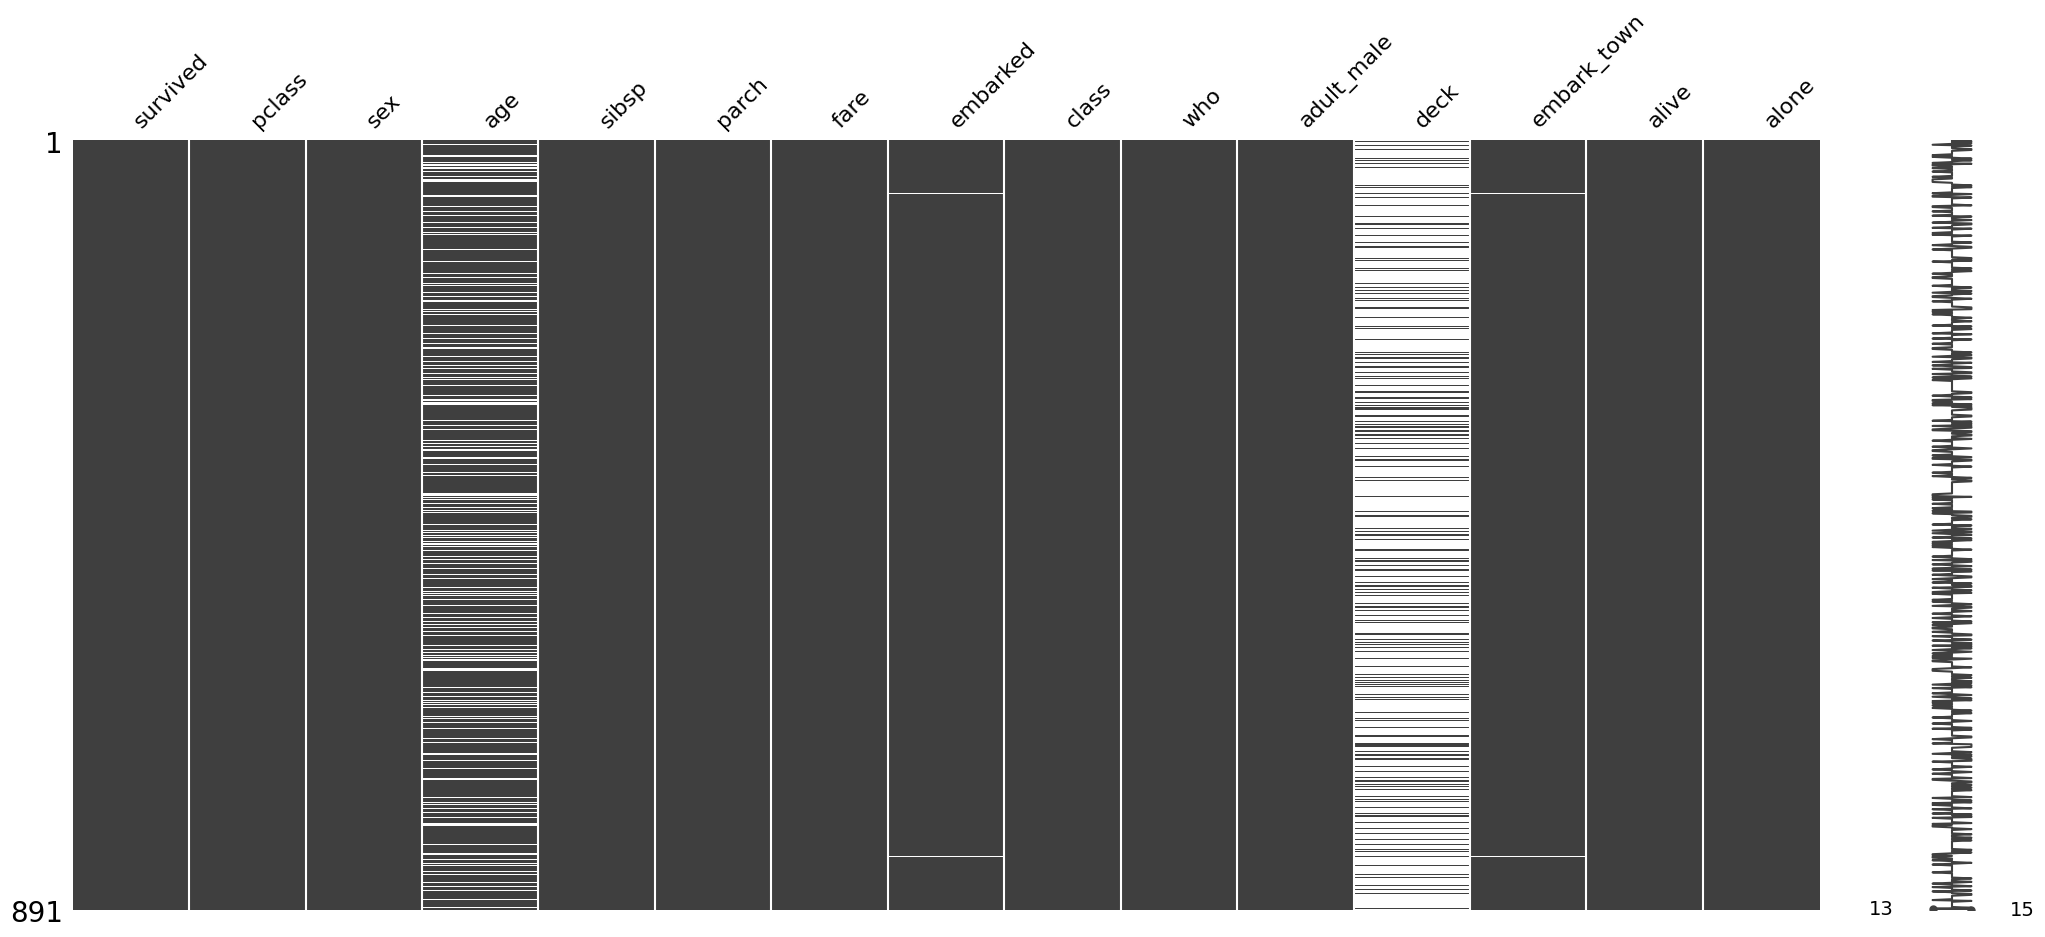

In [ ]:
#결측치 시각화: matrix()
msno.matrix(titanic)

In [ ]:
#'embarked'와 'embark_town' 결측치의 정확한 위치 확인 필요
#'embarked'가 결측치인 행들만 추출
titanic[titanic['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
#'embark_town'이 결측치인 행들만 추출
titanic[titanic['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
#결측치 인덱스만 추출
#titanic['embarked'][0] -> 'S'와 같은 의미
print(titanic['embarked'][titanic['embarked'].isnull()])
print(titanic['embark_town'][titanic['embark_town'].isnull()])

61     NaN
829    NaN
Name: embarked, dtype: object
61     NaN
829    NaN
Name: embark_town, dtype: object


<Axes: >

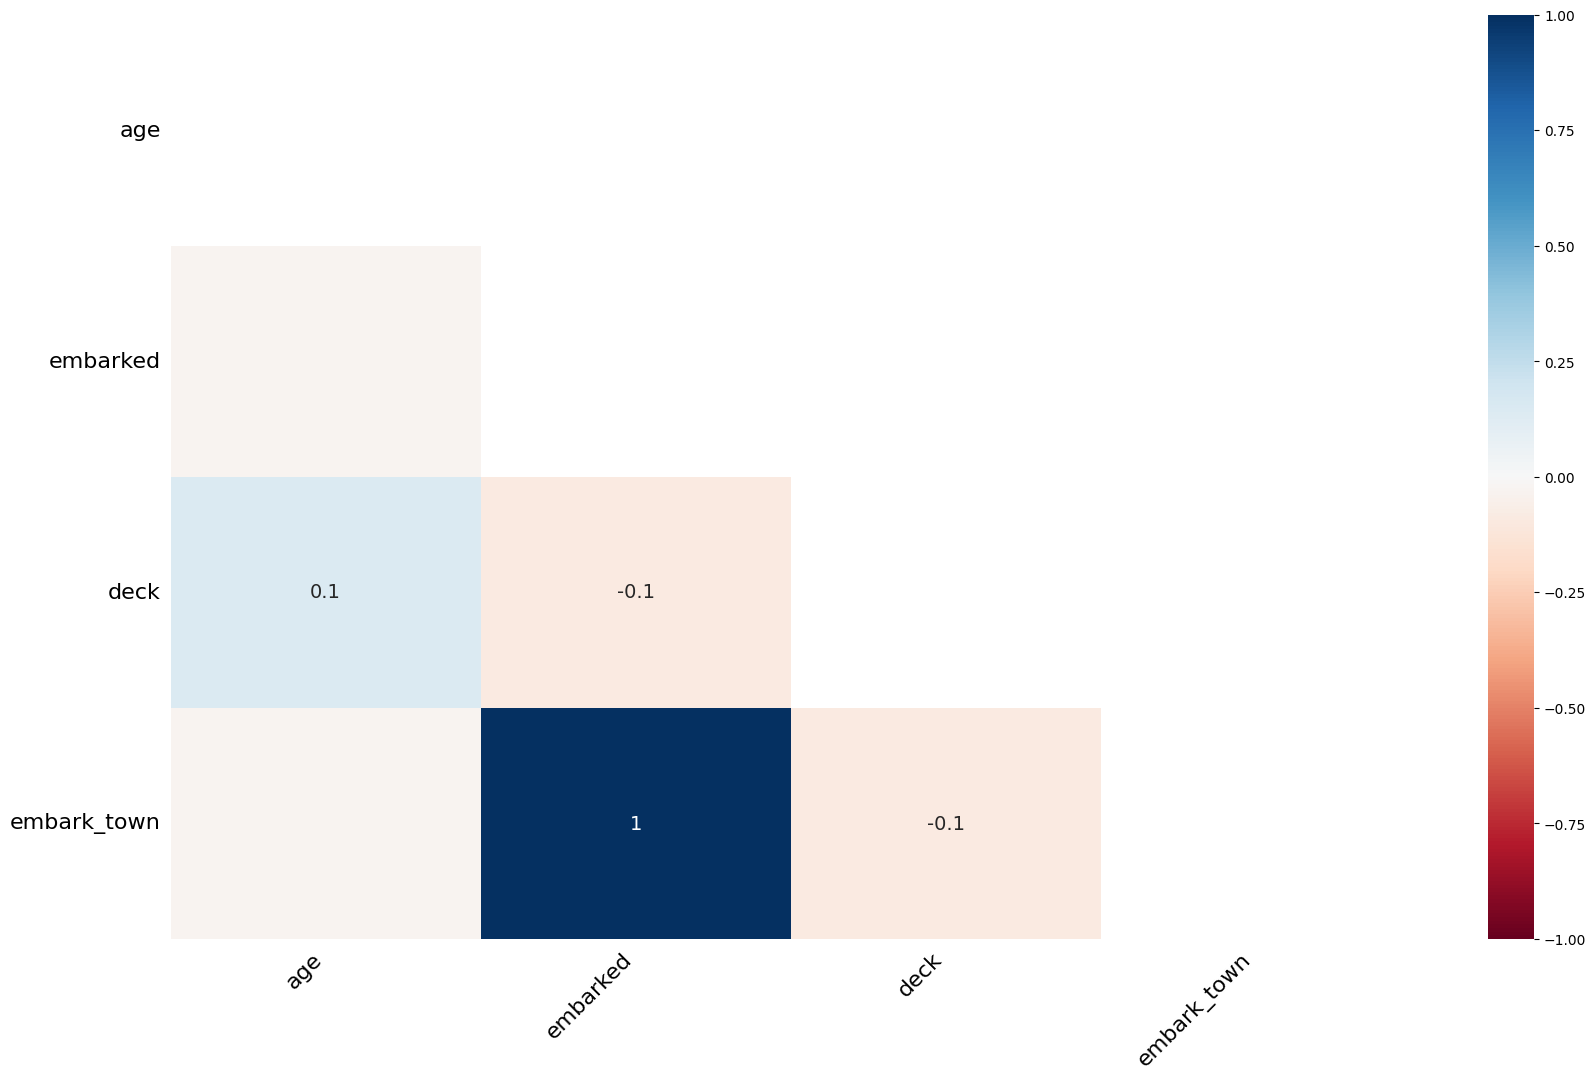

In [ ]:
#두 변수에 대한 결측치 위치가 동일한 것 확인 완료
#msno.heatmap()으로 다시 한 번 확인, R2=1
msno.heatmap(titanic)

In [ ]:
#우선, 결측치로만 이루어진 행이 있다면 행 전체 삭제하고, 데이터 shape 확인
#결측치가 77%인 'deck'는 열 전체 삭제
#'age' 시각화 하여 결측치 처리 방법 결정

In [ ]:
#우선, 결측치로만 이루어진 행이 있다면 행 전체 삭제하고, 데이터 shape 확인
#변화 없음 -> 결측치로만 이루어진 행 없음
titanic2 = titanic.dropna(how='all')
print(titanic.shape)
print(titanic2.shape)

(891, 15)
(891, 15)


In [ ]:
#결측치가 77%인 'deck'는 열 전체 삭제
#두 가지 방법
#(1) 결측치가 특정 개수 이상인 열 삭제: drop(axis=1, thresh=N)
#(2) 결측치가 특정 비율 이상인 열 삭제

In [ ]:
#Q.결측치가 500개 이상인 열 삭제: axis=1, thresh 사용
#변화 없었던 'titanic2' 그대로 사용
#'deck' 한 개의 feature 제거
titanic2 = titanic.dropna(axis=1, thresh=500)
print('titanic 열: ', titanic.columns, len(titanic.columns))
print('titanic2 열: ', titanic2.columns, len(titanic2.columns))

titanic 열:  Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object') 15
titanic2 열:  Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object') 14


In [ ]:
#Q.결측치가 50% 이상인 열 삭제
#열제거(결측치 조건)의 형태, 방법 (1)과는 차이 있음
#titanic.columns[titanic.isnull().sum()/len(titanic)>0.5] => ['deck']
titanic3 = titanic.drop(titanic.columns[titanic.isnull().sum()/len(titanic)>0.5], axis=1)
print('titanic 열: ', titanic.columns, len(titanic.columns))
print('titanic3 열: ', titanic3.columns, len(titanic3.columns))

titanic 열:  Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object') 15
titanic3 열:  Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object') 14


In [ ]:
#titanic2의 각 데이터 별로 결측치의 비율(%)은?
titanic2.isnull().sum()/len(titanic)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
#msno.matrix(DataFrame) 형태이어야 함.
###msno.matrix(titanic2['age'])

In [ ]:
titanic2['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

177

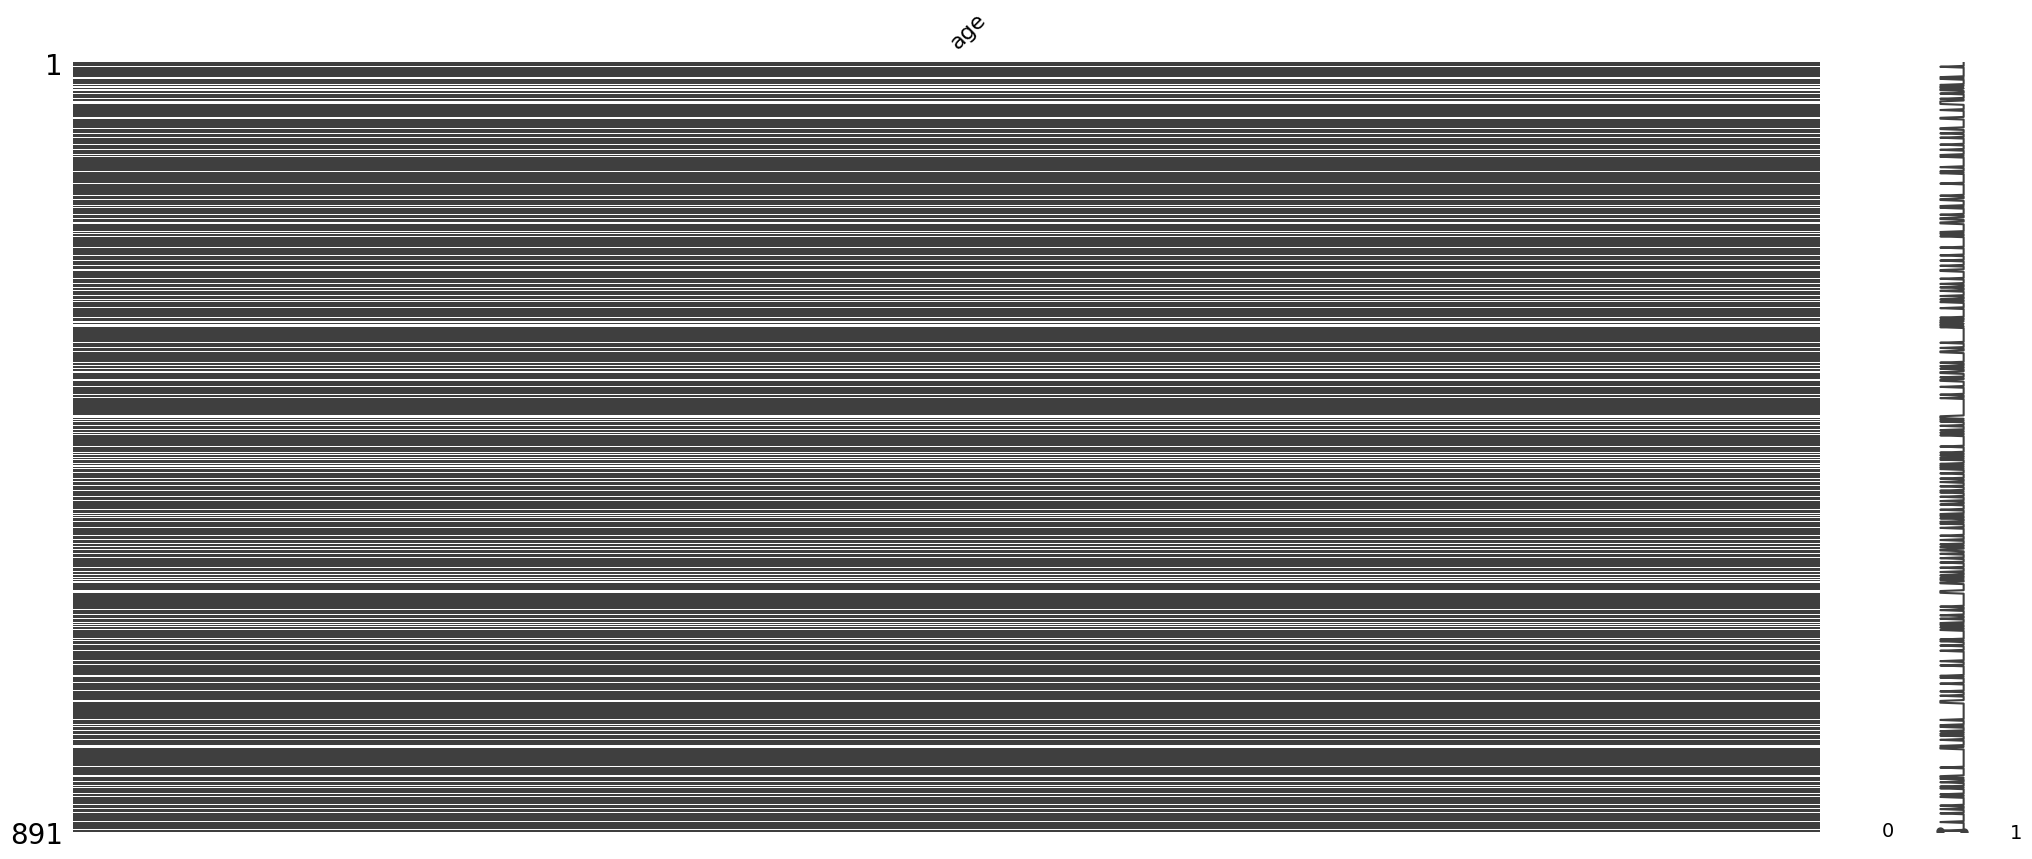

In [ ]:
#Q.'age' 열만 msno.matrix()로 시각화
#'age'를 DataFrame 형태로 생성 후 시각화
age = pd.DataFrame(titanic2['age'])
msno.matrix(age)
titanic2['age'].isnull().sum()

<Axes: ylabel='age'>

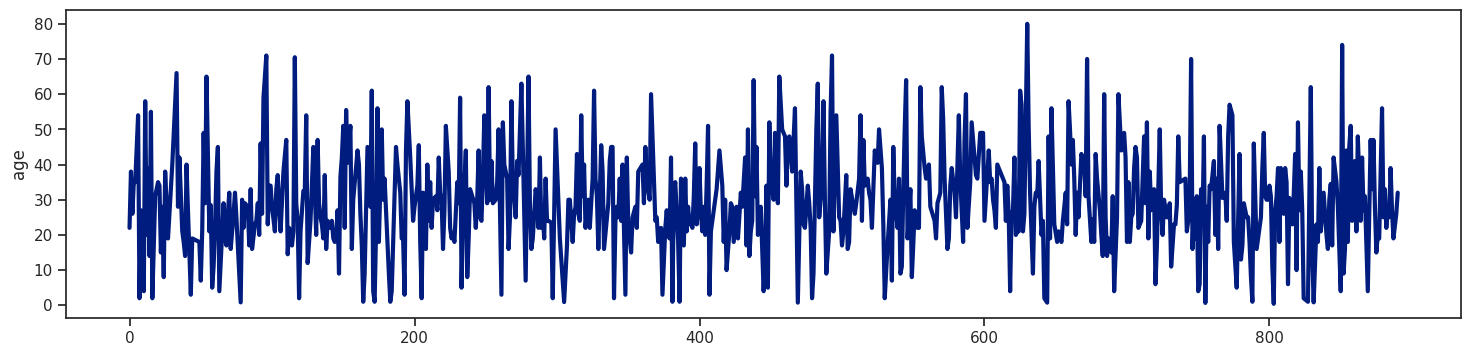

In [ ]:
#Q.결측치 처리 방법 결정을 위한 'age' 시각화, 시각화 방법은 알아서!
#나는 sns.lineplot

sns.set_theme(context='notebook', style='ticks', palette='dark')

plt.figure(figsize=(18,4))
sns.lineplot(titanic2['age'], linewidth='3')
#보간은 의미 없고,
#나라면 평균으로 결측치 처리

0

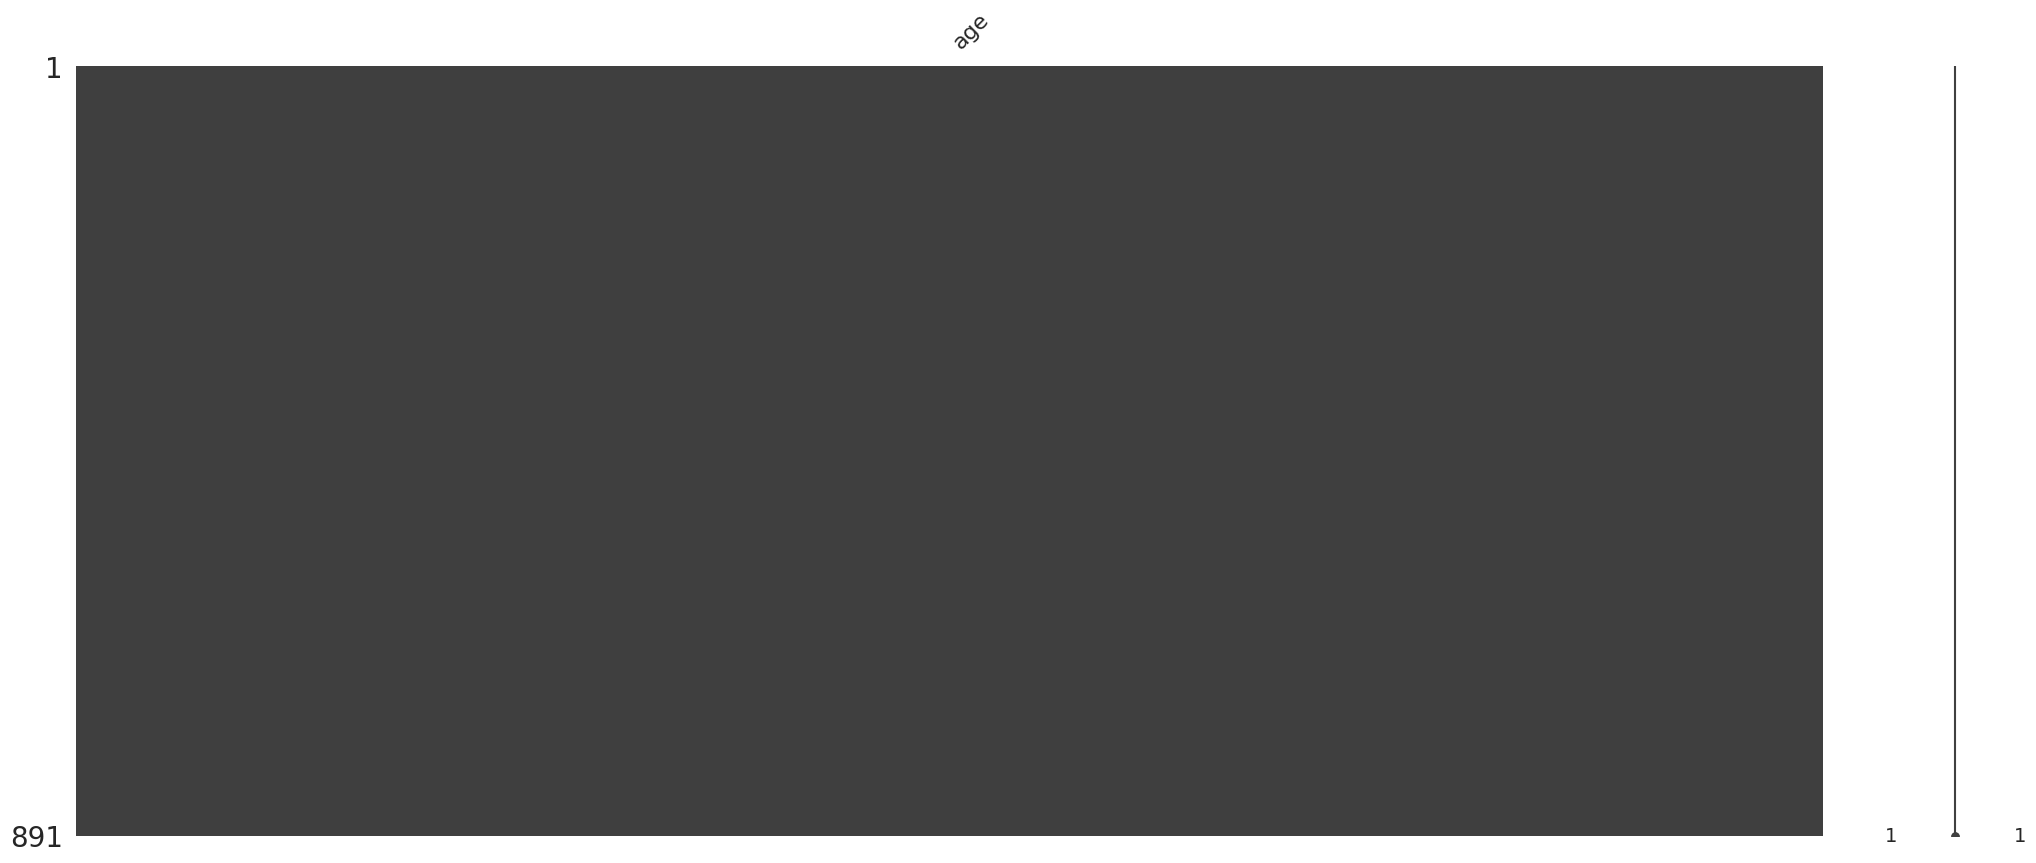

In [ ]:
#'age'의 결측치를 평균으로 처리하고 확인
#fillna()는 비휘발성 메서드
#따라서 다른 변수에 저장, 또는 inplace=True를 이용하여 덮어쓰기
titanic2['age'] = titanic2['age'].fillna(titanic2['age'].mean())
#titanic2['age'].fillna(titanic2['age'].mean(), inplace=True)

age2 = pd.DataFrame(titanic2['age'])
msno.matrix(age2)
titanic2['age'].isnull().sum()

In [ ]:
#titanic2의 각 데이터 별로 결측치의 비율(%)은?
titanic2.isnull().sum()/len(titanic)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
#연령의 결측치를 전체 평균으로 처리하는 것이 과연 옳은 방법일까?
#세분화된 분류에 따라 분류별 평균을 적용하는 것은 어떨까? 나쁘지 않다!
#그룹별 평균 적용!!!!!!!

In [ ]:
#'age' 결측치 처리 전 파일 = 'titanic3'
titanic3.isnull().sum()/len(titanic)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
#groupby()를 이용하여 그룹별 평균으로 결측치 처리
#titanic3[titanic3['age'].notnull()].groupby(['sex'])['age'].mean()

#아래 코드는 당연히 에러, titanic3['age']에는 groupby()할 ['sex']가 없음
#titanic3['age'].notnull().groupby(['sex'])['age'].mean()
titanic3[titanic3['age'].notnull()].groupby(['sex'])['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [ ]:
#합리적인 방법이라 생각했지만 남성/여성의 평균 나이가 별 차이가 없다.
#위에서 'age' 전체 평균을 이용한 결측치 처리와 차이 없다.
#다른 방법을 생각해 보자!
#변수들 중에서 'Pclass'에 따라서도 연령의 차이가 나지 않을까?
#충분히 생각해 볼만 하다.

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64
pclass
1    14.802856
2    14.001077
3    12.495398
Name: age, dtype: float64


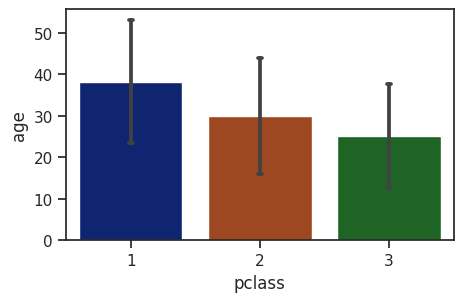

In [ ]:
#Q.그럼 'Pclass'별 'age' 평균(with 표준편차)을 시각화 해서 확인해 보자

#(1-1)'pclass'별 'age' barplot()
plt.figure(figsize=(5,3))
sns.barplot(data=titanic3, x='pclass', y='age', ci='sd', capsize=0.03)
#(1-2)'pclass'별 'age'의 평균과 표준편차
print(titanic3[titanic3['age'].notnull()].groupby(['pclass'])['age'].mean())
print(titanic3[titanic3['age'].notnull()].groupby(['pclass'])['age'].std())

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,186.0,38.23,14.8,0.92,27.0,37.0,49.0,80.0
2,173.0,29.88,14.0,0.67,23.0,29.0,36.0,70.0
3,355.0,25.14,12.5,0.42,18.0,24.0,32.0,74.0


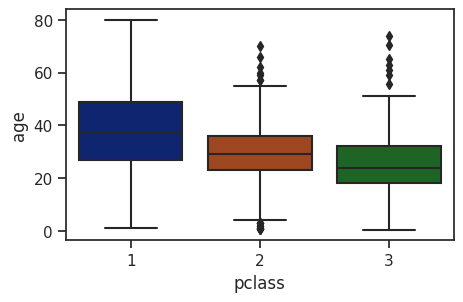

In [ ]:
#(2-1)'pclass'별 'age' boxplot()
plt.figure(figsize=(5,3))
sns.boxplot(data=titanic3, x='pclass', y='age')
#(2-2)'pclass'별 'age' boxplot() 관련 데이터 구하기
titanic3.groupby('pclass')['age'].describe().round(2)

In [ ]:
#titanic3 데이터 정보 확인
titanic3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [ ]:
#'pclass'별 'age' 평균
titanic3.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [ ]:
#성별에 따른 'age' 평균 보다는 객실등급에 따른 'age' 평균으로 결측치 처리 결정
#아래 코드(.mean())는 fillna()가 수행되지 않는다.
#'pclass' 별로 'age'를 평균 낸 값을 해당 자리에 채우지 못한다.
#transform('mean')을 사용하면 해결!
#titanic3['age'].fillna(titanic3.groupby('pclass')['age'].mean(), inplace=True)
titanic3['age'].fillna(titanic3.groupby('pclass')['age'].transform('mean'), inplace=True)

---
###(참고)transform() 메서드

In [ ]:
sample = pd.DataFrame({'a' : [1, 2, 3, 1, 2, 3], 'b' : [4, 5, 6, 4, 5, 7]})
sample

,a,b
0,1,4
1,2,5
2,3,6
3,1,4
4,2,5
5,3,7


In [ ]:
#'a'로 groupby: 'a'의 '1'에 해당하는 'b'값은 4, 4
#sum() 이기 때문에 4+4=8
#이 값을 'c'열에 배치해야 하는데 마땅한 자리가 없어서 해당 index 자리(=1)에 배치
#이럴때 transforma() 메서드 사용
sample['c'] = sample.groupby('a')['b'].sum()
sample

,a,b,c
0,1,4,NaN
1,2,5,8.0
2,3,6,10.0
3,1,4,13.0
4,2,5,NaN
5,3,7,NaN


In [ ]:
#transforma() 메서드 사용
#sum() 결과를 'a'에 해당하는 자리에 배치
sample['d'] = sample.groupby(by = ['a'])['b'].transform(sum)
sample

,a,b,c,d
0,1,4,NaN,8
1,2,5,8.0,10
2,3,6,10.0,13
3,1,4,13.0,8
4,2,5,NaN,10
5,3,7,NaN,13


---

0

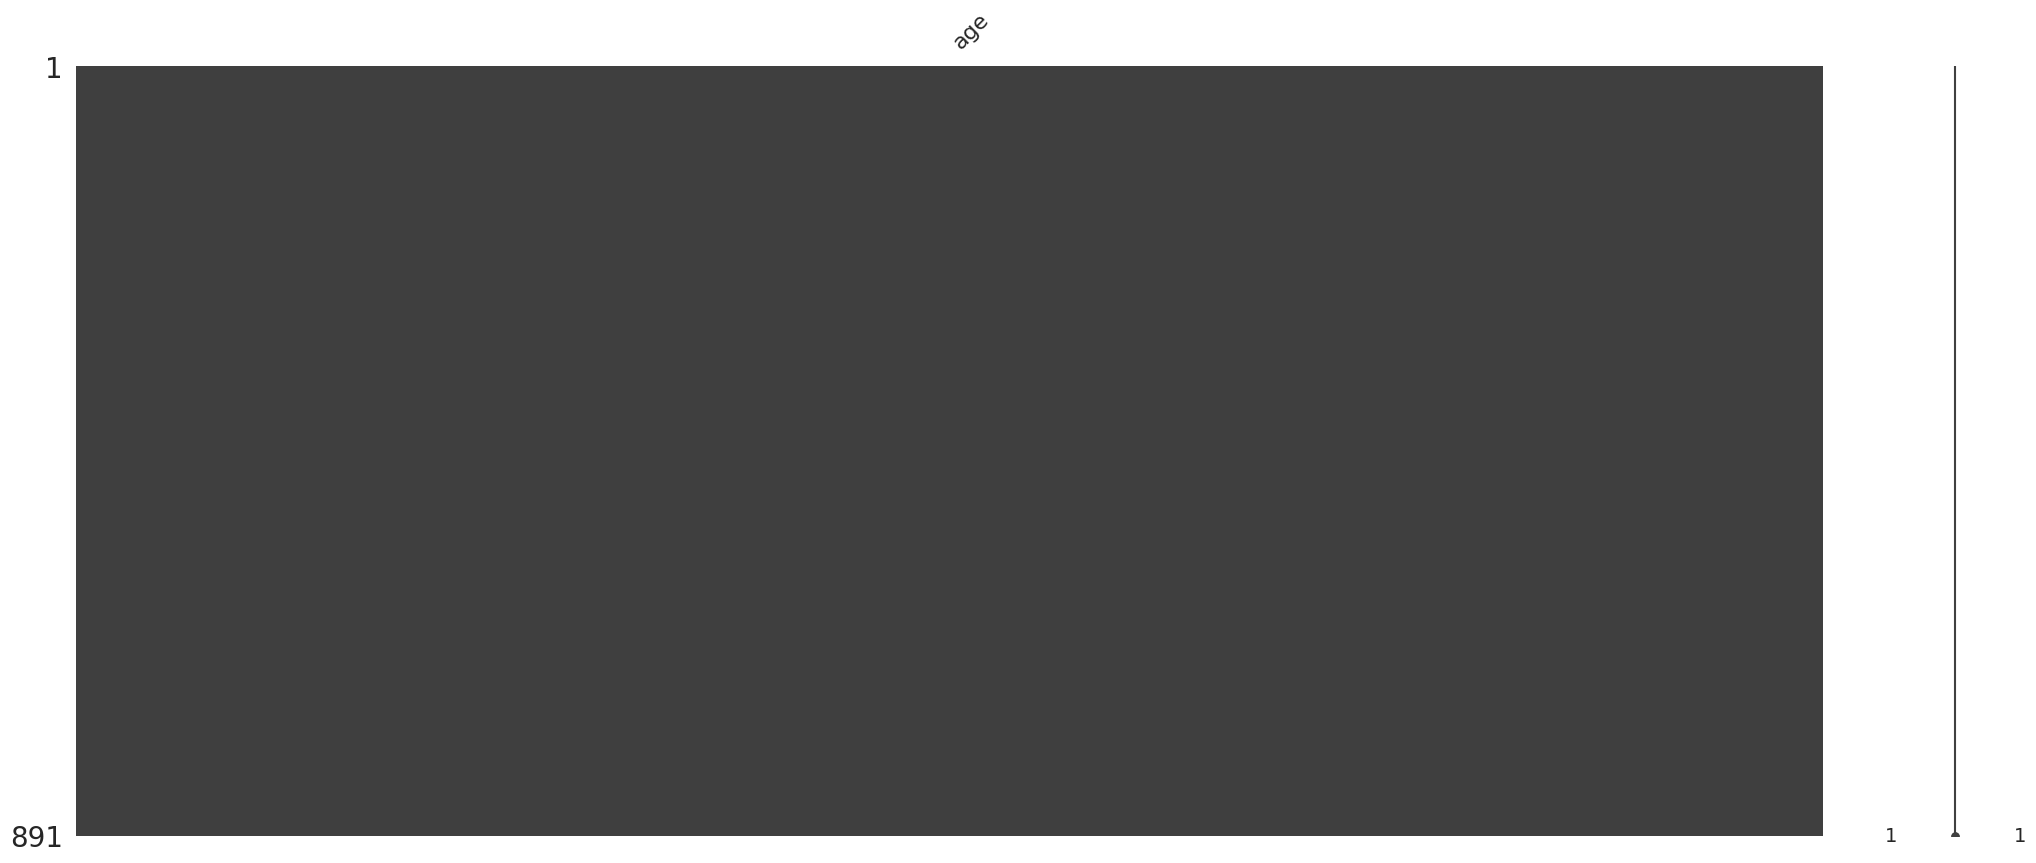

In [ ]:
#결측치 처리 결과 확인
age3 = pd.DataFrame(titanic3['age'])
msno.matrix(age3)
titanic3['age'].isnull().sum()

In [ ]:
#titanic3의 결측치 비율 확인
titanic3.isnull().sum()/len(titanic)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
#이제 마지막 단계, 동일한 'embarked'와 'embark_town' 결측치 처리
#Q.결측치 처리 방법 결정을 위한 시각화, 시각화 방법은 알아서!
#역시 순서에 따른 데이터의 변화를 보는 것이 낫기 때문에 sns.lineplot

<Axes: ylabel='embarked'>

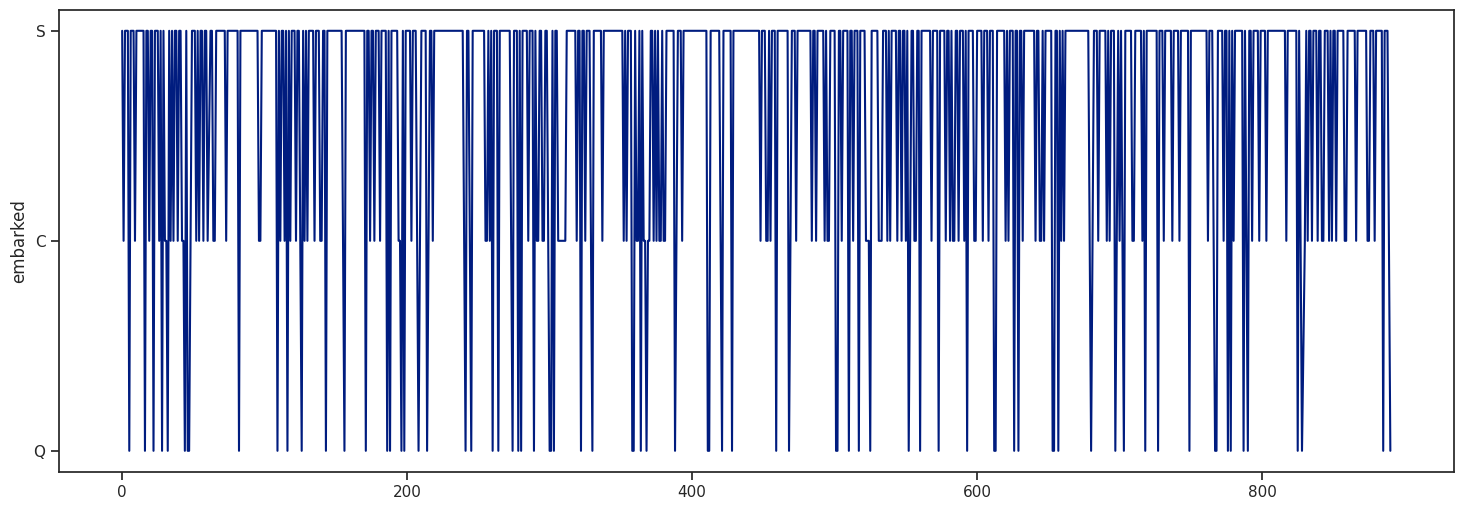

In [ ]:
#일정한 패턴 없음. 그리고 결측치가 2개 밖에 없음.
#그냥 삭제해도 되고, 앞 값이나 뒤에 값으로 채워도 될 듯
plt.figure(figsize=(18,6))
sns.lineplot(titanic3['embarked'])

In [ ]:
#Q.'embarked' 또는 'embark_town'의  결측치가 있는 행 삭제하고 결측치 시각화
#'embarked'와 'embark_town' 결측치는 동일하기 때문에 하나만 삭제해도 됨
titanic4 = titanic3.dropna(subset=['embarked'])
titanic4.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
#Q.titanic3: 'embarked'와 'embark_town'을 앞 값으로 채워서 격측치 처리
titanic3['embarked'].fillna(method='ffill', inplace=True)
titanic3['embark_town'].fillna(method='ffill', inplace=True)
titanic3.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
print(titanic3.shape)   #ffill
print(titanic4.shape)   #dropna

(891, 14)
(889, 14)


<Axes: >

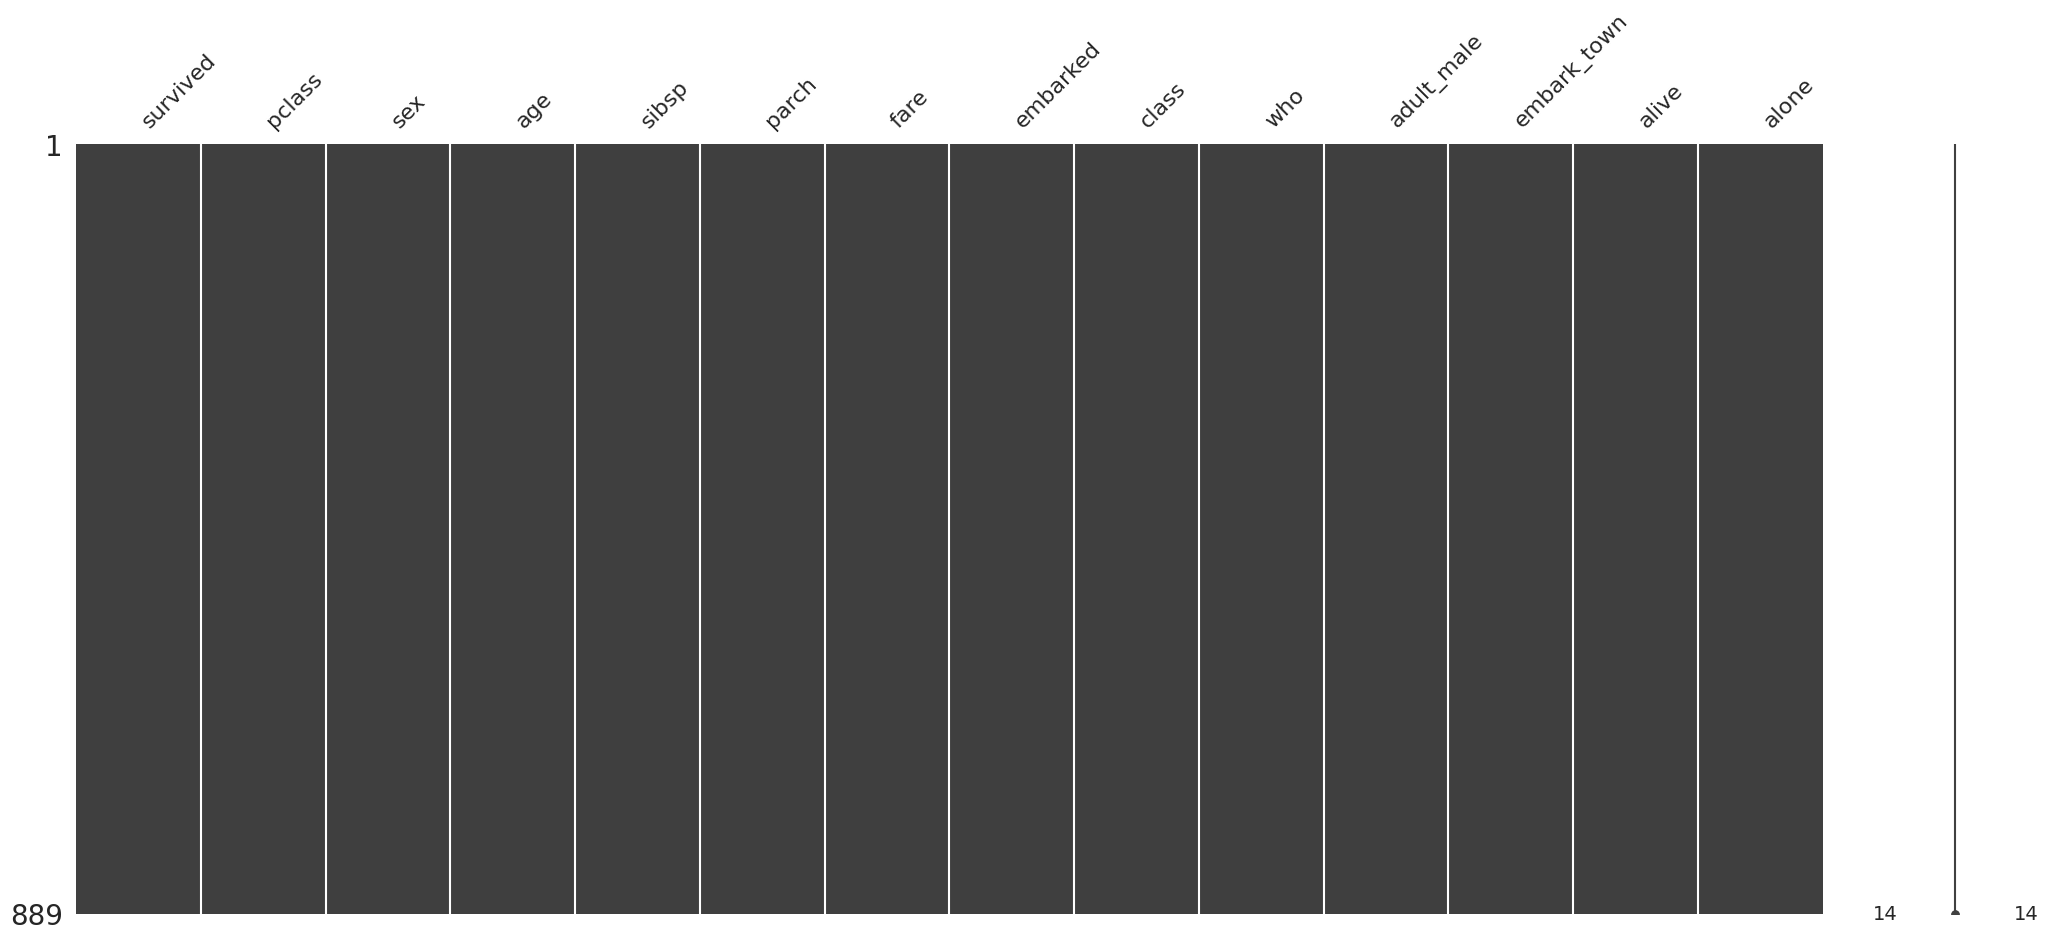

In [ ]:
#Q.결측치 처리 완료된 titanic3의 결측치 시각화
msno.matrix(titanic4)

<Axes: >

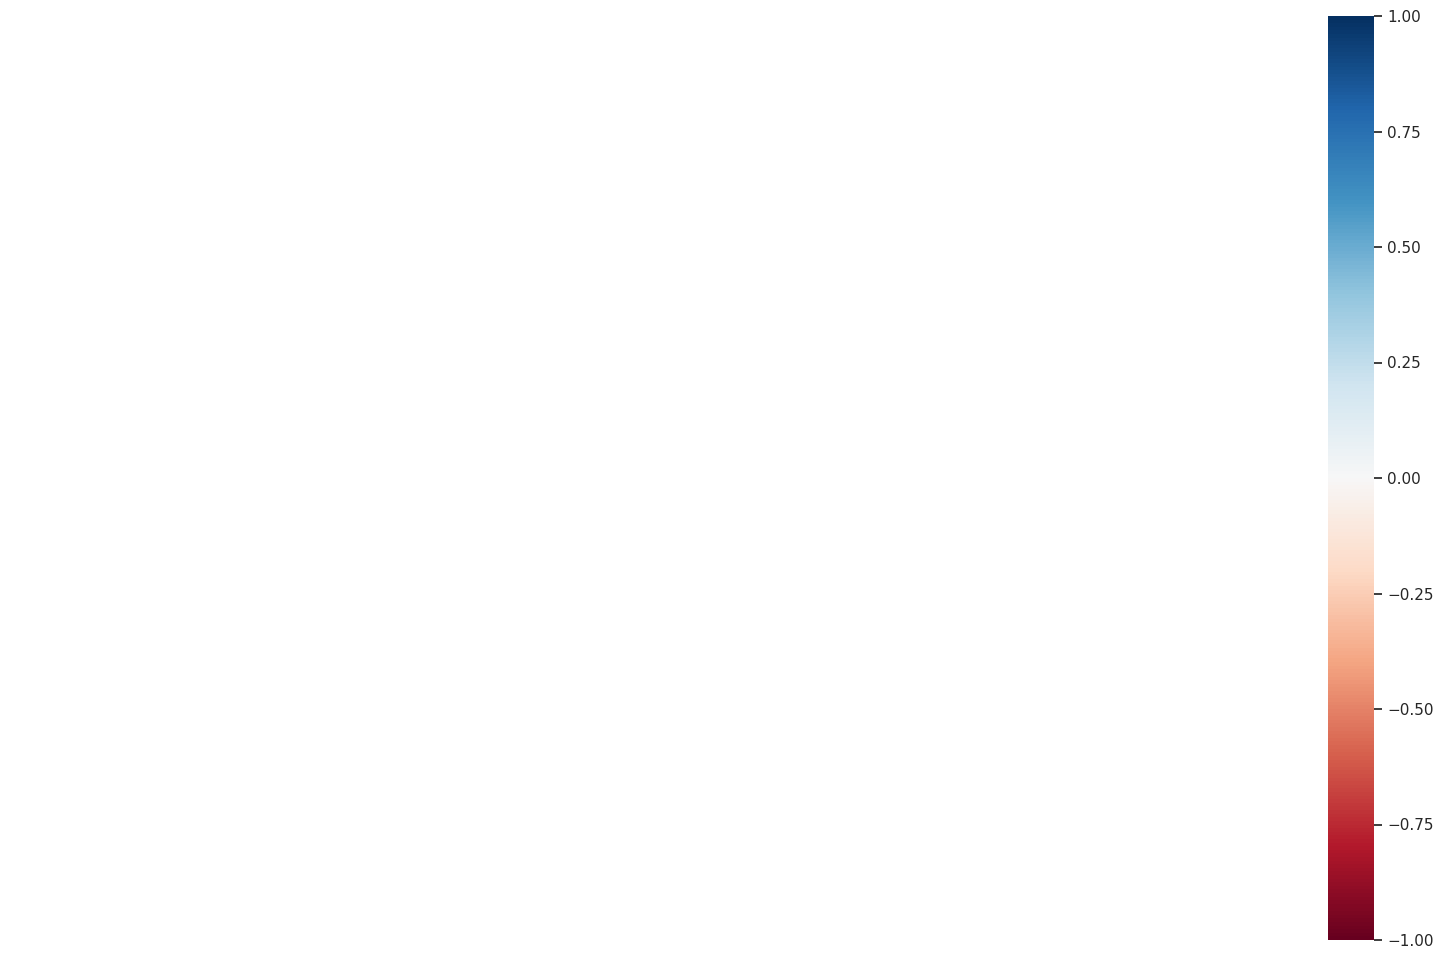

In [ ]:
msno.heatmap(titanic4)

<Axes: >

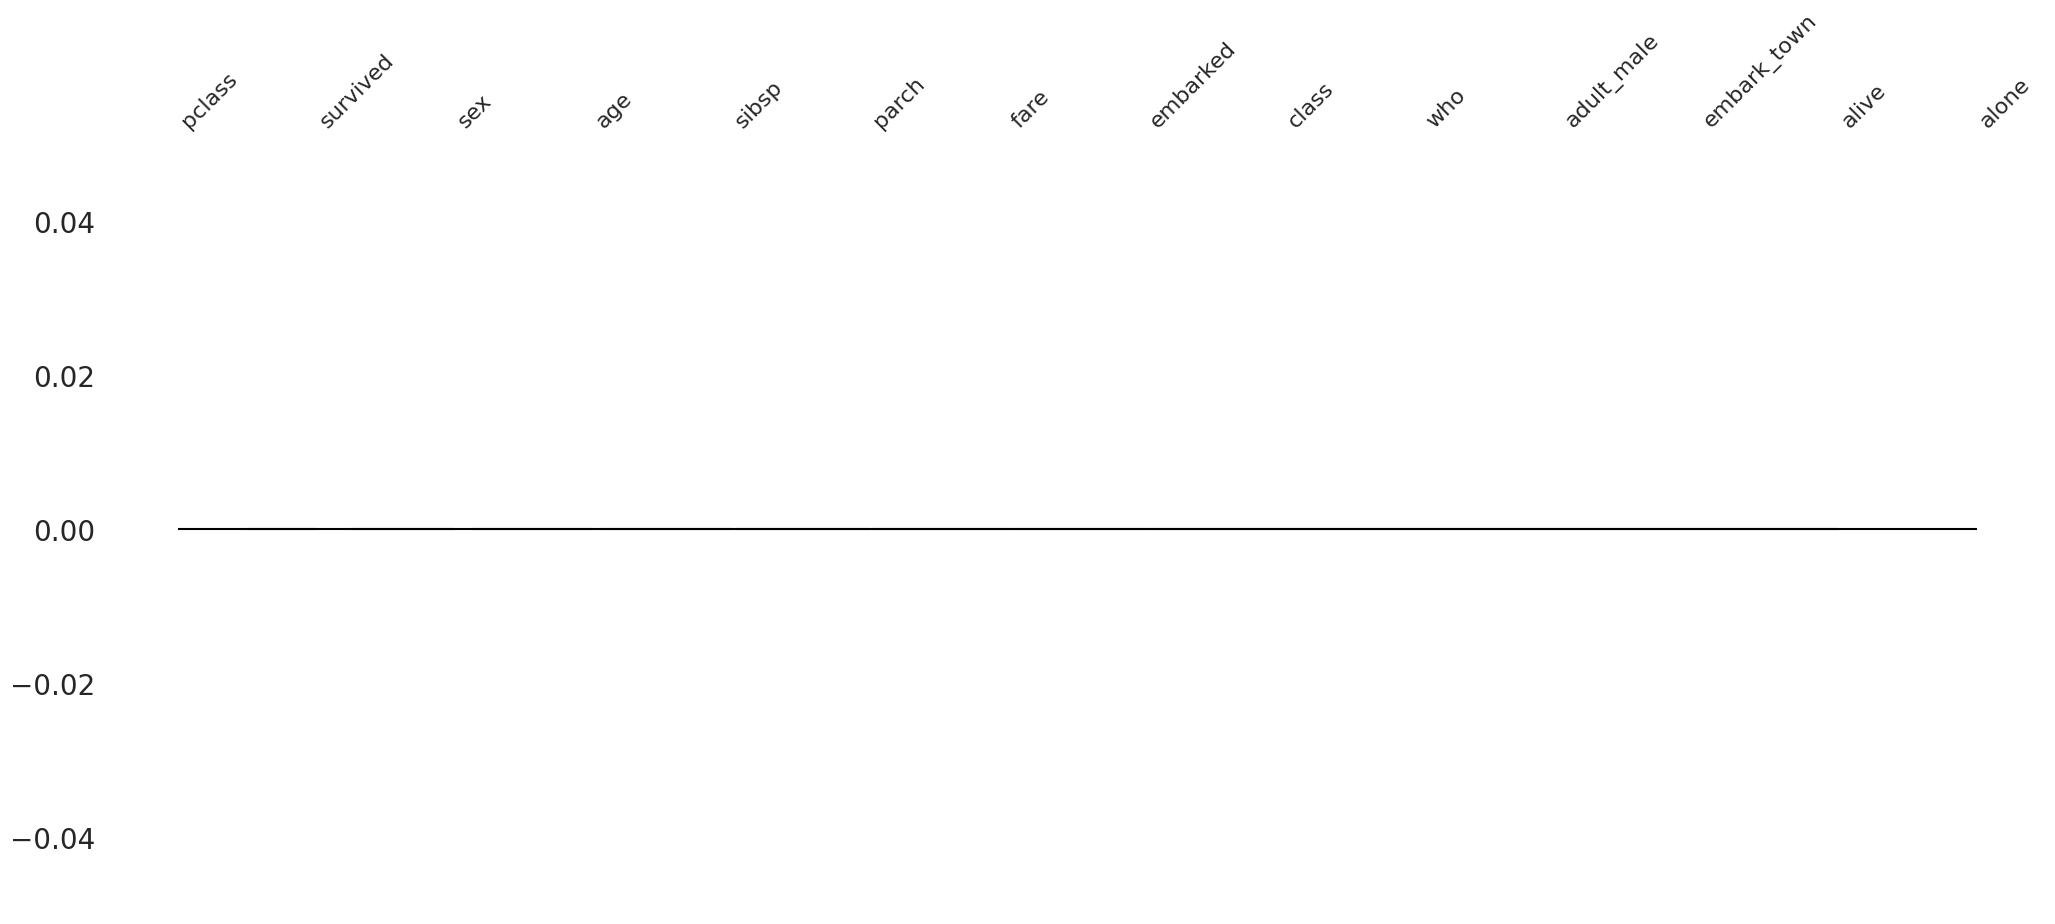

In [ ]:
msno.dendrogram(titanic4)